# Python Assignment - Working With Events

In this question, you are given 4 text files. 
These files contain timestamps, which correspond to the times of some 'events'. 

Your first task is to find out how many events are present in each file.

Consider only those events which have a positive value for timestamp


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = [
    r"C:\Users\rogbg\Downloads\event_Q1.txt",
    r"C:\Users\rogbg\Downloads\event_Q2.txt",
    r"C:\Users\rogbg\Downloads\event_Q3.txt",
    r"C:\Users\rogbg\Downloads\event_Q4.txt"
]

# Function to read events from a file
def read_events(file_path):
    events = []
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split(',')
            for value in values:
                event = float(value)
                if event > 0:
                    events.append(event)
    return events
# Read events from files
all_events = []
for file_path in file_paths:
    events = read_events(file_path)
    all_events.append(events)

After this, for each file, make a plot of events per second in that file.
You dont have to find the average rate, instead for each second 0-1, 1-2, 2-3, .. 54-55, find the number of events in each second and plot it with respect to time.

Plot these 4 separately, as well as in a single overlapping plot.
Make sure to give proper titles, labels and legends.

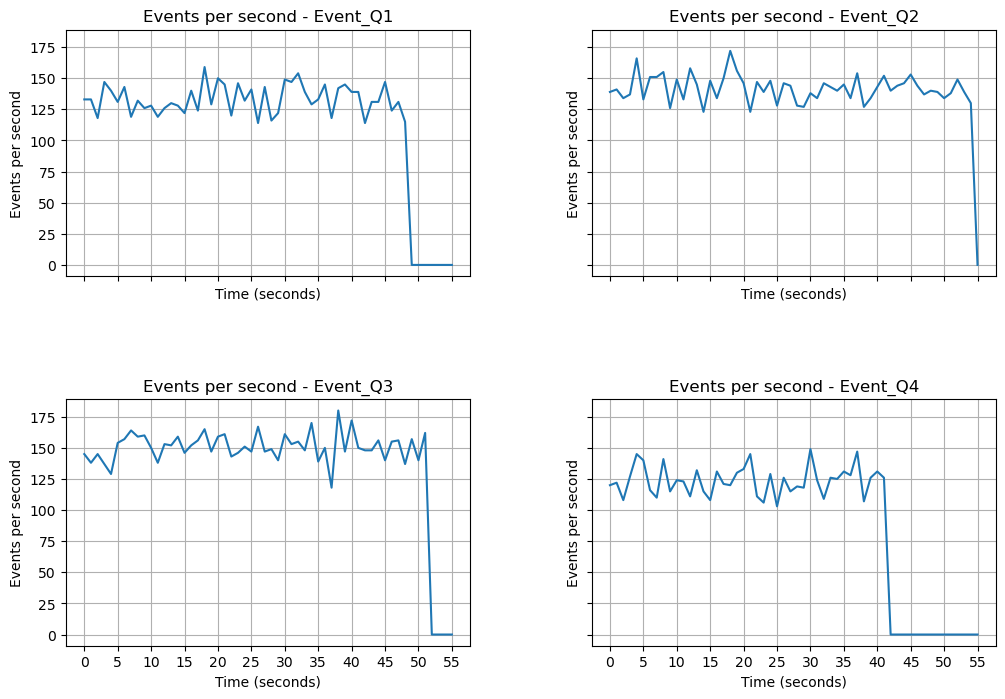

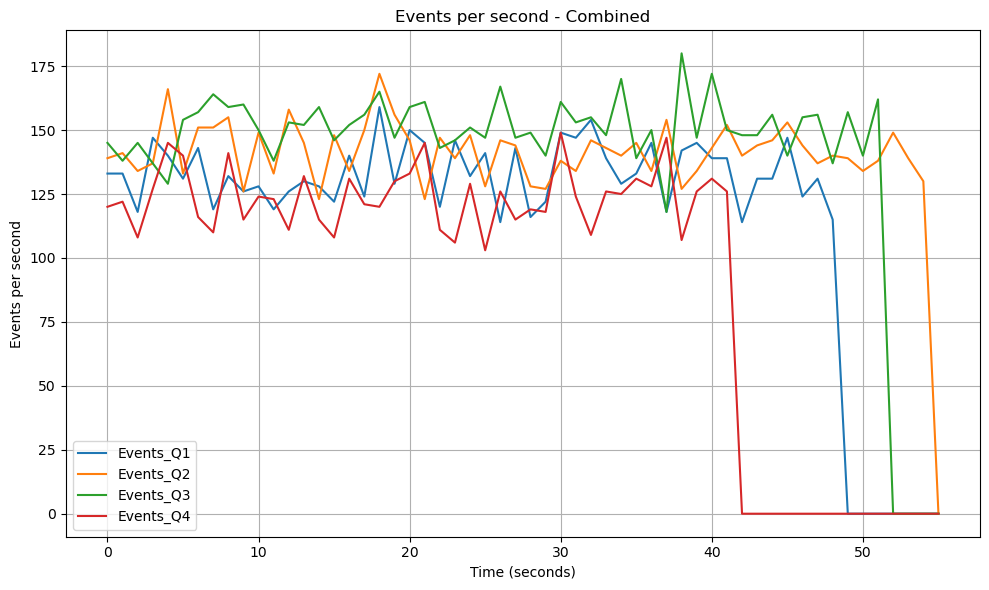

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten()  # Flatten the axes array for easier iteration

bin_counts = 0

for i, events in enumerate(all_events):
    events_per_sec = [0] * 56  # List to store events per second
    for event in events:
        sec = int(event)
        if sec < 56:
            events_per_sec[sec] += 1

    # Plotting separately
    ax = axes[i]
    ax.plot(range(56), events_per_sec)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Events per second")
    ax.set_title(f"Events per second - Event_Q{i+1}")
    ax.grid(True)
    plt.sca(ax)
    plt.xticks(range(0, 56, 5))  # Set x-axis tick positions
    # Count bins with more than 140 events
    bin_counts += sum(1 for count in events_per_sec if count > 140)
    
# Plotting for combined graph
fig_combined, ax_combined = plt.subplots(figsize=(10, 6))
for i, file_path in enumerate(file_paths):
    events = read_events(file_path)
    events_per_sec = [0] * 56  # List to store events per second
    for event in events:
        sec = int(event)
        if sec < 56:
            events_per_sec[sec] += 1
    ax_combined.plot(range(56), events_per_sec, label=f"Events_Q{i+1}")

# Plotting settings for combined graph
ax_combined.set_xlabel("Time (seconds)")
ax_combined.set_ylabel("Events per second")
ax_combined.set_title("Events per second - Combined")
ax_combined.legend()
ax_combined.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Give your insights on what you observe in the various plots. Regarding frequency of events in various files as well as the total duration each file is covering.

# Insights
Event_Q1 vanishes after about 47 second, Event_Q2 vanishes after 55 second, Event_Q3 vanishes after 52 seconds, Event_Q4 vanishes after 42 seconds. Moreover Event_Q1 occurs between the frequency 112 to 164 , Event_Q2 occurs between the frequency  125 to 175, Event_Q3 occurs between the frequency 120 to 180, Event_Q4 occurs between the frequency 100 to 150.

Now for the final part of this question. We can see that the event frequency varies with time. Count how many bins are there, where atleast 2 of the files have more than 140 events in that bin, simultaneously.

In [25]:
# Count the number of bins with at least 2 files having more than 140 events
bin_count = 0

# Create a dictionary to store the counts for each bin
bin_counts = {i: 0 for i in range(56)}

# Iterate over the files and count events per bin
for file_path in file_paths:
    events = read_events(file_path)
    events_per_sec = [0] * 56
    for event in events:
        sec = int(event)
        if sec < 56:
            events_per_sec[sec] += 1
    for i, count in enumerate(events_per_sec):
        if count > 140:
            bin_counts[i] += 1

# Count the number of bins with at least 2 files having more than 140 events
for count in bin_counts.values():
    if count >= 2:
        bin_count += 1

print(f"Number of bins with at least 2 files having more than 140 events: {bin_count}")

Number of bins with at least 2 files having more than 140 events: 33


## Bonus

Let us do this more generally Generate a table with the threshold along one axis and the number of files along the other axis. Fill the table with counts of bins where atleast num_files have more than threshold events in that bin. In the previous part, num_files was 2 and num_bins was 140. Do this for num_files in [1,2,3,4]. num_bins in [130,135,140,145,150,155,160]. Print the table.

In [ ]:
#your code here